<center><img src='img/cdy.png' style='width:500px; float: left; margin: 0px 30px 15px 0px'></center>

# Text pre-processing and Word Clouds
## Class 16 - Data Science Curriculum 





# ⏪ Recap last class

- what is NLP?

# 🚀 Today's agenda

- Text pre-processing
- Word Cloud

<center><img src='img/pipeline.png' style='width:1500px; margin: 0px 30px 15px 0px'></center>

In [1]:
# Load sample data
import pandas as pd
df = pd.read_csv("airline_tweets.csv")

In [2]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Feature Engineering for NLP

1. Lowercase
2. Remove punctuation and stop-words
3. Tokenize
4. Stemming
5. Lemma 

# 1. Lowercase

In [7]:
text = "Hi, how are you? This is my number: 777-777-777"
text = text.lower()
text

'hi, how are you? this is my number: 777-777-777'

In [3]:
df['pp'] = df['text'].apply(lambda row: row.lower())

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,pp
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),@virginamerica what @dhepburn said.
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),@virginamerica plus you've added commercials t...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),@virginamerica i didn't today... must mean i n...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),@virginamerica it's really aggressive to blast...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),@virginamerica and it's a really big bad thing...


# 2. Remove punctuation 

In [8]:
import re

text = re.sub(r"[\W\d]", " ", text)
text

'hi  how are you  this is my number             '

In [9]:
df['pp'] = df['pp'].apply(lambda row: re.sub(r"[\W\d]", " ", row))

In [11]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,pp
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica what dhepburn said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus you ve added commercials t...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica i didn t today must mean i n...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica it s really aggressive to blast...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica and it s a really big bad thing...


# 3. Tokenize

Tokenization is the process of converting a sequence of characters into a sequence of tokens (lexical components).

In [12]:
text = text.split()
text

['hi', 'how', 'are', 'you', 'this', 'is', 'my', 'number']

In [13]:
df['pp'] = df['pp'].apply(lambda row: row.split())

# 4. Remove stop words

In [14]:
! pip install nltk

In [15]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw = stopwords.words('english')
sw.append('https')
sw.append('co')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vivianamarquez/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
text = [word for word in text if word not in sw]
text

['hi', 'number']

In [17]:
df['pp'] = df['pp'].apply(lambda text: [word for word in text if word not in sw])

In [18]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,pp
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"[virginamerica, dhepburn, said]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[virginamerica, plus, added, commercials, expe..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"[virginamerica, today, must, mean, need, take,..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"[virginamerica, really, aggressive, blast, obn..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"[virginamerica, really, big, bad, thing]"


# 5. Stemming (optional)

Stemming is the process of removing suffixes to reduce a word to its root so that all its variants are represented in the same way.

The most popular algorithms are:

- Porter
- Snowball

Although the stemming process often does not linguistically produce the correct base form of the word, it is frequently used in search engines to bring up relevant results.

In [19]:
from nltk.stem.snowball import SnowballStemmer
englishStemmer = SnowballStemmer("english")

# 🚗

In [20]:
englishStemmer.stem("car")

'car'

In [21]:
englishStemmer.stem("cars")

'car'

# 💃🏿

In [22]:
englishStemmer.stem("dancing")

'danc'

In [23]:
text = [englishStemmer.stem(word) for word in text if word not in sw]
text

['hi', 'number']

In [24]:
df['pp_op'] = df['pp'].apply(lambda text: [englishStemmer.stem(word) for word in text if word not in sw])

In [25]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,pp,pp_op
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"[virginamerica, dhepburn, said]","[virginamerica, dhepburn, said]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[virginamerica, plus, added, commercials, expe...","[virginamerica, plus, ad, commerci, experi, ta..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"[virginamerica, today, must, mean, need, take,...","[virginamerica, today, must, mean, need, take,..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"[virginamerica, really, aggressive, blast, obn...","[virginamerica, realli, aggress, blast, obnoxi..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"[virginamerica, really, big, bad, thing]","[virginamerica, realli, big, bad, thing]"


# 6. Lematization (optional)

Lemmatization is the process of finding the lemma of a word (representative of all forms of the same word).

It is not the same as stemming!
In linguistics, the lemma is an autonomous constituent unit of the lexicon of a language.

In [26]:
import nltk 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 

lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize("dancing", pos='v')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vivianamarquez/nltk_data...


'dance'

In [27]:
df['pp_op2'] = df['pp'].apply(lambda text: [lemmatizer.lemmatize(word, pos='v') for word in text if word not in sw])


In [28]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,pp,pp_op,pp_op2
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"[virginamerica, dhepburn, said]","[virginamerica, dhepburn, said]","[virginamerica, dhepburn, say]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[virginamerica, plus, added, commercials, expe...","[virginamerica, plus, ad, commerci, experi, ta...","[virginamerica, plus, add, commercials, experi..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"[virginamerica, today, must, mean, need, take,...","[virginamerica, today, must, mean, need, take,...","[virginamerica, today, must, mean, need, take,..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"[virginamerica, really, aggressive, blast, obn...","[virginamerica, realli, aggress, blast, obnoxi...","[virginamerica, really, aggressive, blast, obn..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"[virginamerica, really, big, bad, thing]","[virginamerica, realli, big, bad, thing]","[virginamerica, really, big, bad, thing]"


- Stemming works with words without knowing their context and that is why stemming has a lower precision, but it is faster than lemmatization.

- Lemmatization returns a real word.

- If the level of precision does not matter and all you need is speed, stemming is better.

# Word Cloud


`pip install wordcloud`

`pip install Pillow`

In [30]:
! pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/54/e5/7969f3b4a58bd4ac19e60e86f6a23925c19416ec065725b530f40c692e0e/wordcloud-1.9.4-cp310-cp310-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.7/167.7 kB 5.9 MB/s eta 0:00:00


In [31]:
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

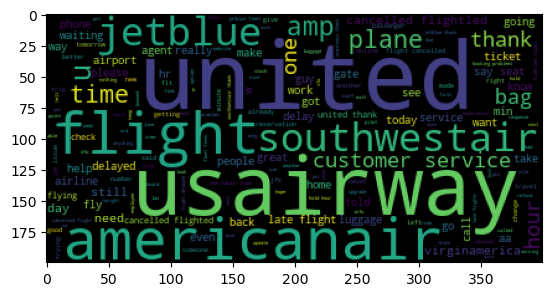

In [33]:
words = " ".join(sum(df['pp'].tolist(),[]))
wordcloud = WordCloud().generate(words)

plt.imshow(wordcloud)
plt.show()

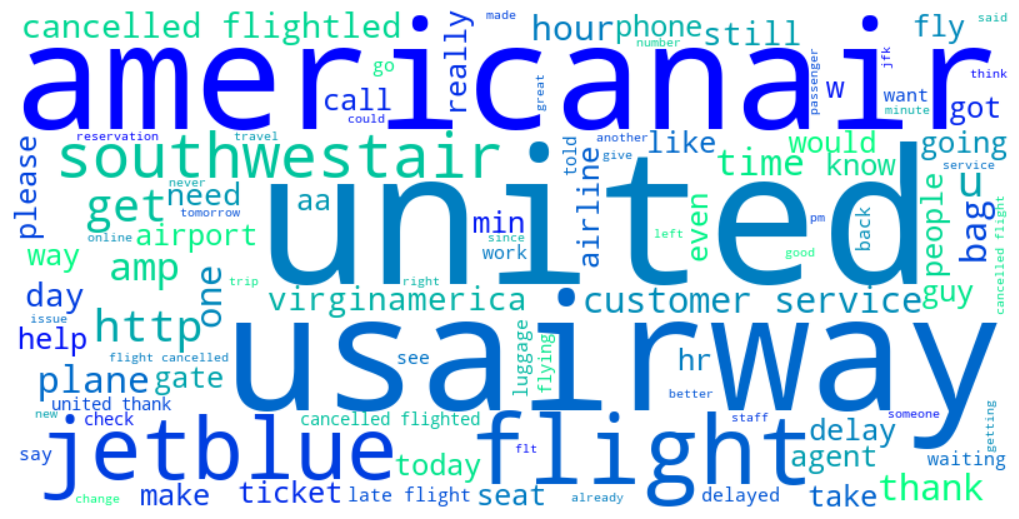

In [60]:
#  https://www.datacamp.com/community/tutorials/wordcloud-python
words = " ".join(sum(df['pp'].tolist(),[]))
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="winter",
                      stopwords=sw, collocations=True).generate(words) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


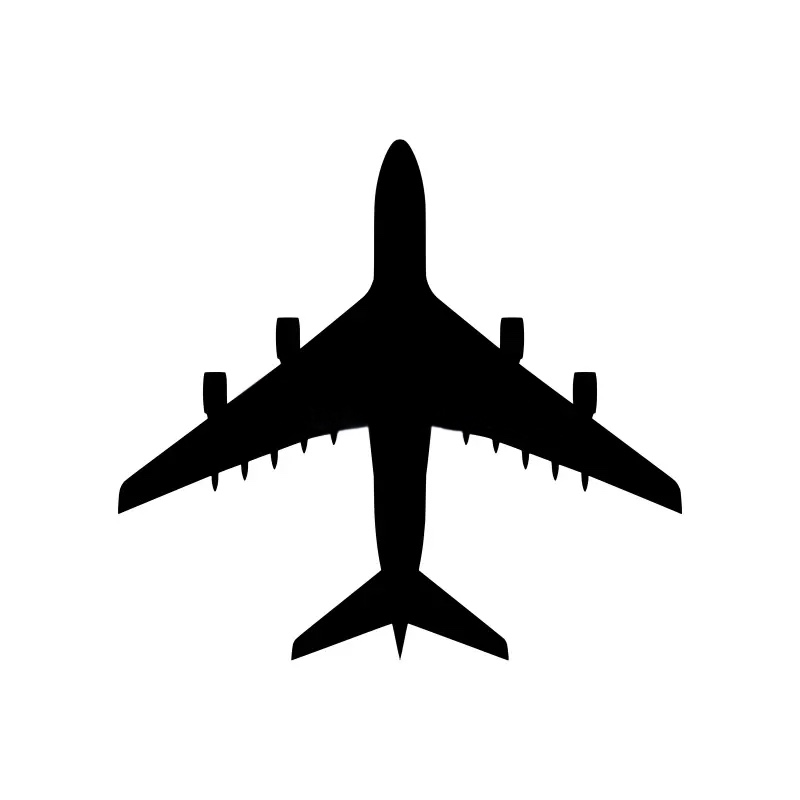

In [56]:
img = PIL.Image.open("img/plane.JPG")
display(img)

In [57]:
mask = np.array(img)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

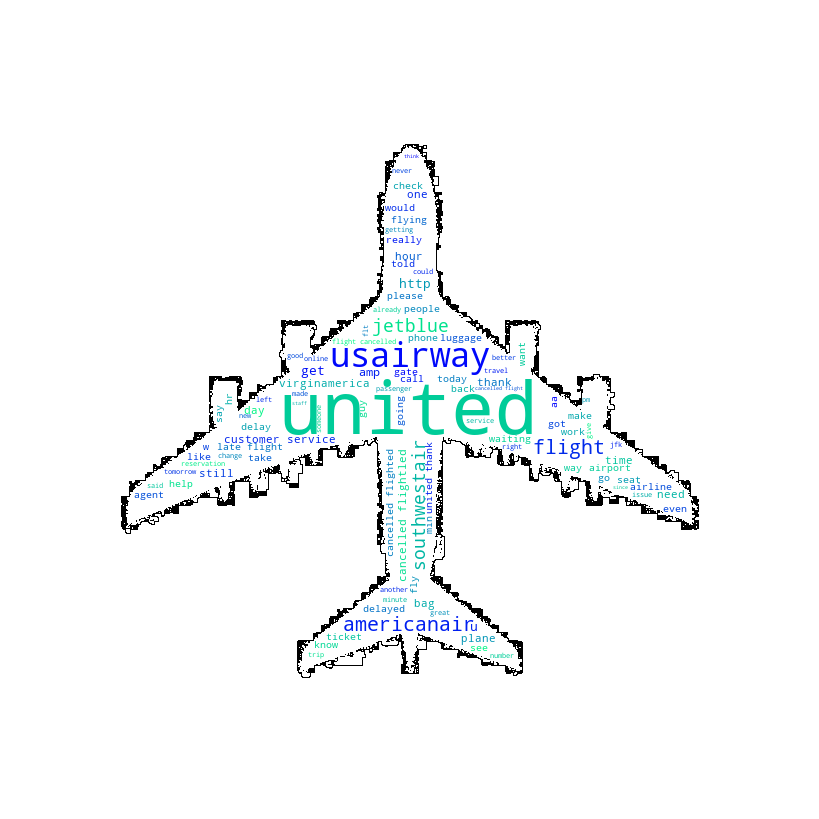

In [61]:
words = " ".join(sum(df['pp'].tolist(),[]))
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="winter",
                      stopwords=sw, collocations=True,
                      mask=mask, contour_width=1, contour_color='black').generate(words) 

wordcloud.to_file("nlp_bur.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

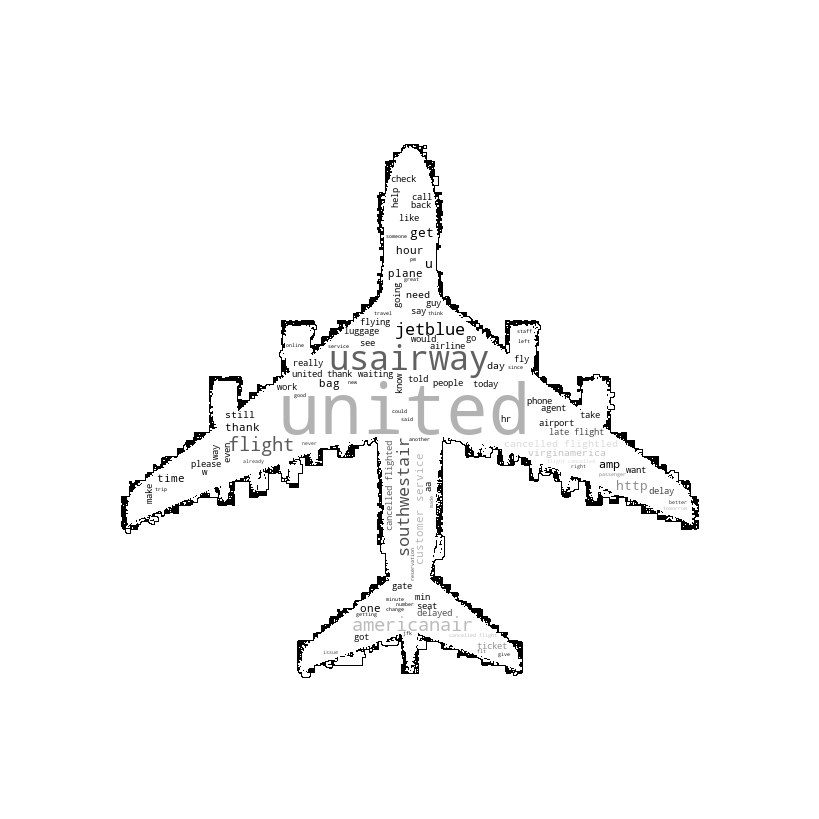

In [62]:
words = " ".join(sum(df['pp'].tolist(),[]))
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="winter",
                      stopwords=sw, collocations=True,
                      mask=mask, contour_width=1, contour_color='black').generate(words) 

image_colors=ImageColorGenerator(mask)

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# ⏪ Today's recap

- Text pre-processing
- Word Cloud

# Next class: TF-IDF